In [13]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [14]:
DATA_DIR = './cats and dogs'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'training_set/training_set')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test_set/test_set')

In [15]:
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)
CATEGORIES.pop(-1)
print(CATEGORIES)

['dogs', 'cats', '.DS_Store']
['dogs', 'cats']


In [16]:
X_train = []
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        X_train = cv2.imread(os.path.join(path,img))
        i += 1

In [17]:
mean_rgb = np.mean(X_train, axis=(0,1))
print(mean_rgb)

[104.02513514 107.86722297 106.61960135]


In [18]:
X_train_norm = np.empty_like(X_train)
for i in range(len(X_train)):
    for c in range(3):
        if(c==1):
            X_train_norm[i, :, c] = X_train[i, :, c] - mean_rgb[0]
        elif(c==2):
            X_train_norm[i, :, c] = X_train[i, :, c] - mean_rgb[1]
        else:
            X_train_norm[i, :, c] = X_train[i, :, c] - mean_rgb[2]

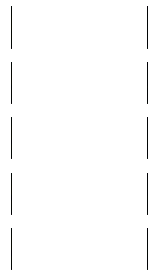

In [19]:
c = 0
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [ ]:
model = keras.Sequential([
    keras.Input(shape=X_train_norm.shape[1:]),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

    layers.Flatten(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()